# A1: Jupyter Notebooks, LaTeX & Julia
## Solutions

## B. LaTeX [40 pts]

Taylor expansion: 

$$f(x) = f(a) + f'(a) (x - a) + \frac{1}{2} f''(a) (x-a)^2 + R(x).$$


1. **[10 pts]** Write down the integral form of $R(x)$, as seen above.

$$R(x) = \int_{a}^x f'''(t) \frac{(x - t)^2}{2} \mathrm{d}t $$

2. **[30 pts]** Prove that, for $x \geq 0$, there exists a unique $W(x) \geq 0$ for which $W(x) e^{W(x)} = x$. Show that $\Omega := W(1)$ satisfies $0.56 < \Omega < 0.58$.

*Proof.* The function $f(w) := w e^w$ is continuously differentiable on $\mathbb R$ with $f(0) = 0$, $f(w) \geq 0$ for all $w \geq 0$, and $f(w) \to \infty$ as $w \to \infty$. Therefore, for all $x\geq 0$ there exists a $w_x$ for which $f(0) \leq x < f(w_x)$. Since $f$ is continous, we may apply the intermediate value theorem to conclude there exists $W \in [0, w_x]$ such that $f(W) = x$. Moreover, $f'(w) = (w + 1)e^w > 0$ and so $f$ is strictly increasing on $[0,\infty)$. As a result, if $W' < W < W''$ then $f(W') < x < f(W'')$ and so $W(x) := W$ is the unique solution to $f(W) = x$.

Finally, since $f(0.56) < 1 < f(0.58)$ (see Julia code below), we have $0.56 < \Omega < 0.58$ (again since $f$ is continuous and strictly increasing).

(f(0.56), f(0.58)) = (0.9803766001658167, 1.0359022898350425)


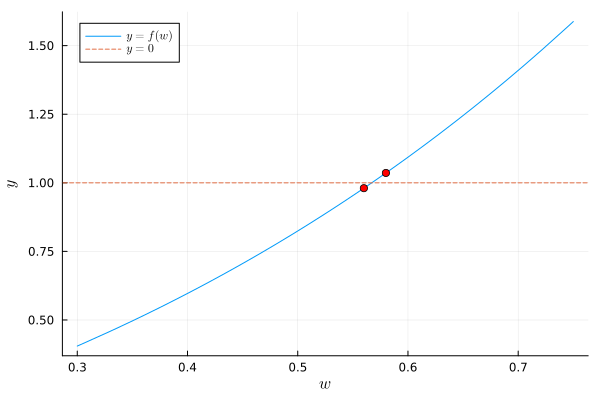

In [15]:
using Plots 
using LaTeXStrings

f = w -> w * exp(w);

@show ( f(0.56), f(0.58) );

plot(f, 0.3, .75, 
    xlabel = L"w",
    ylabel = L"y",
    label = L"y = f(w)")

hline!( [1], 
    label= L"y = 0",
    linestyle=:dash)

scatter!( [0.56, 0.58], [f(0.56), f(0.58)] , 
    primary=false, color="red" )

# C. Julia [40 pts]

1. **[10 pts]** Approximate $\pi$ with $\pi_1 := 22/7$ and $\pi_2 := 355/113$ and compute the corresponding absolute and relative errors.

In [2]:
π1 = 22/7; π2 = 355/113;
println("absolute error between π and π1 = ", abs( π - π1 ))
println("relative error between π and π1 = ", abs( π - π1 )/π)
println("absolute error between π and π2 = ", abs( π - π2 ))
println("relative error between π and π2 = ", abs( π - π2 )/π)

absolute error between π and π1 = 0.0012644892673496777
relative error between π and π1 = 0.0004024994347707008
absolute error between π and π2 = 2.667641894049666e-7
relative error between π and π2 = 8.49136787674061e-8


2. **[30 pts]** The quantities $$\pi_N := 4 \sum_{n=0}^N \frac{(-1)^n}{2n+1}$$ approximate $\pi$ by using the Taylor expansion of $\arctan$ together with the fact that $\pi = 4 \arctan(1)$.

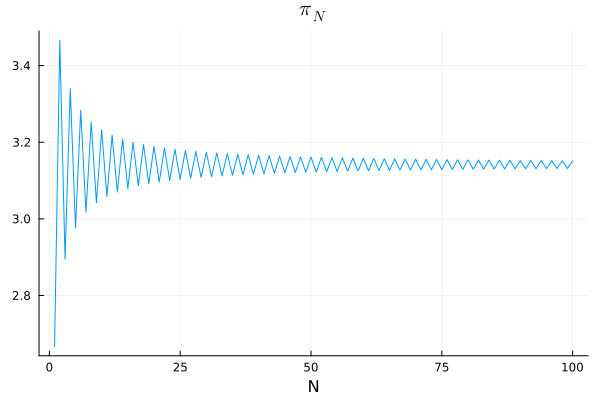

In [3]:
# We need the following packages to plot functions
using Plots
using LaTeXStrings

Nmax = 100;
Ninter = 1:Nmax;

# vectors of length Nmax
p = zeros( Nmax ); q = zeros( Nmax );
p[1] = 4 * ( 1 - 1/3 ) ;
q[1] = abs( p[1] - π );
for N in 2:Nmax
    p[N] = p[N-1] + 4 * (-1)^N/(2*N + 1);
    q[N] = abs( p[N] - π );
end

plot(p, legend=false, xlabel="N", title=L"\pi_N")

Based on the following graph, what is the rate of convergence of this particular approximation to $\pi$? Why do we use a log-log scale for this graph?

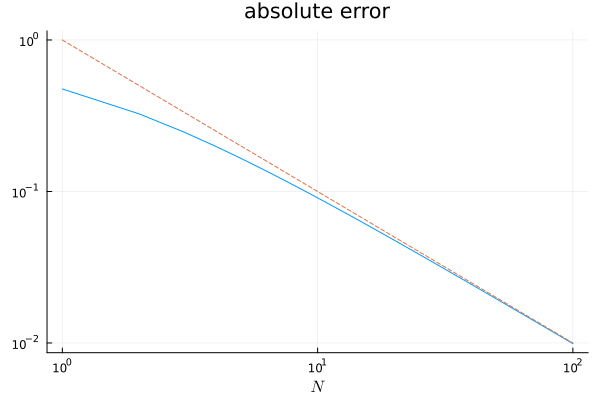

In [4]:
plot( q , xaxis=:log, yaxis=:log, xlabel=L"N", title="absolute error", legend=false)
plot!( Ninter.^(-1) , ls=:dash)

The rate of convergence of this particular approximation is $O(N^{-1})$: we have $\pi = \pi_N + O(N^{-1})$. We use a log-log scale so that we can see the algebraic convergence as a straight line.   

<div class='alert alert-block alert-danger'><b>Remark.</b> 

In fact, you can bound the error by the $N+1$ term in the sequence:

\begin{align}
    \left| \pi - \pi_N \right| \leq \frac{4}{2(N+1)+1} = \frac{4}{2N + 3}
\end{align}

</div> 